# Amazon Fine Food Reviews Analysis

### Downloading Dataset from Kaggle

https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

1. Number of reviews: 568,454
2. Number of users: 256,059
3. Number of products: 74,258
4. Timespan: Oct 1999 - Oct 2012
5. Number of Attributes/Columns in data: 10

Objective:
Given a review, determine whether the review is positive or Critical.

We could use the Score/Rating. 
1. A rating of >=3 could be considered a positive review.
2. A review of <3 could be considered Critical. 

Attribute Information:

1.Id

2.ProductId — unique identifier for the product

3.UserId — unqiue identifier for the user

4.ProfileName

5.Helpfulness Numerator — number of users who found the review helpful

6.HelpfullnessDenominator — number of users who indicated whether they found the review helpful or not

7.Score — rating between 1 and 5

8.Time — timestamp for the review

9.Summary — brief summary of the review

10.Text — text of the review

In [4]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Reading dataset
df=pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
#Sorting data according to ProductId in ascending order
df.sort_values("ProductId",inplace=True)

In [8]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...


In [9]:
df.shape

(568454, 10)

In [10]:
#Deduplication of entries
df.duplicated(subset={"UserId","ProfileName","Time","Text"}).sum()

174521

In [11]:
# Droping the duplicate entries
df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},inplace=True)

In [12]:
df.shape

(393933, 10)

#### We can see that only 69.25 % data is remaining after removing the duplicates, we observed that 30.75% data is duplicated in our original data.

## Exploratory Data analysis

In [13]:
# No of entries in perticular score----> max 5 rating
df["Score"].value_counts()

5    250967
4     56087
1     36307
3     29772
2     20800
Name: Score, dtype: int64

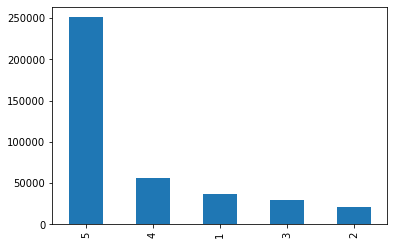

In [14]:
# Plotting the score
df["Score"].value_counts().plot(kind='bar')

#### I first looked at the distribution of ratings among all of the reviews. We see that 5-star reviews constitute a large proportion (64%) of all reviews. The next most prevalent rating is 4-stars(14%), followed by 1-star (9%), 3-star (8%), and finally 2-star reviews (5%).

In [15]:
#HelpfullnessDenominator — number of users who indicated whether they found the review helpful or not.
# percentage of people not posted the review.
df["HelpfulnessDenominator"].value_counts()[0]/df.shape[0]*100

46.86558374139765

#### Among all reviews, almost half (47%) are not voted on at all.

In [16]:
# posted reviews are helpful or not.
helpful=df[df["HelpfulnessDenominator"]!=0][["HelpfulnessNumerator","HelpfulnessDenominator"]]

In [17]:
helpful["helpful_score"]=helpful["HelpfulnessNumerator"]/helpful["HelpfulnessDenominator"]

In [18]:
def helpful_fun(x):
    if x >0.75 and x<=1:
        return ">75%"
    elif x>0.25 and x<=0.75:
        return "25%-75%"
    else:
        return "<25%"

In [19]:
helpful["helpful_score"].map(helpful_fun).value_counts()

>75%       144910
25%-75%     37348
<25%        27056
Name: helpful_score, dtype: int64

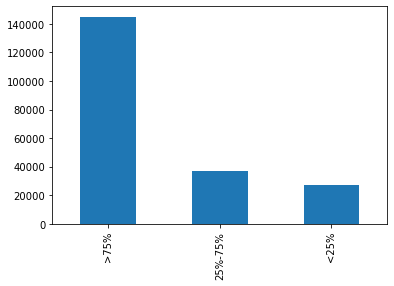

In [20]:
helpful["helpful_score"].map(helpful_fun).value_counts().plot(kind='bar')

#### I divided the reviews that were voted upon into three categories:

Helpful reviews had more than 75% of voters find the review helpful

unhelpful reviews had less than 25% of voters find the review helpful

and an intermediate group of 25-75% helpfulness.

In [21]:
# no of words count according the Score
score_group=df[["Score","Text"]] 

In [22]:
score_group["Text_count"]=score_group["Text"].map(lambda x:len(x.split()))  #---> counting the no of words in rows.

In [23]:
score_group.head()

,Score,Text,Text_count
150528,4,In June<br />I saw a charming group<br />of ro...,95
150506,4,This is a fun way for children to learn their ...,35
150505,4,"I grew up reading these Sendak books, and watc...",48
150504,4,Get the movie or sound track and sing along wi...,30
150503,4,A very entertaining rhyming story--cleaver and...,28


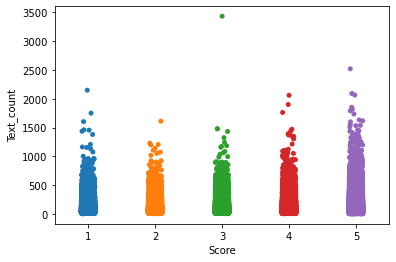

In [24]:
sns.stripplot(x='Score', y='Text_count', data=score_group)

#### The 5 score reviews are longer

In [25]:
score_group.groupby("Score").get_group(5).describe()

,Score,Text_count
count,250967.0,250967.000000
mean,5.0,73.935223
std,0.0,72.122172
min,5.0,3.000000
25%,5.0,32.000000
50%,5.0,52.000000
75%,5.0,89.000000
max,5.0,2520.000000


In [26]:
score_group.groupby("Score").get_group(4).describe()

,Score,Text_count
count,56087.0,56087.000000
mean,4.0,91.961863
std,0.0,87.545680
min,4.0,6.000000
25%,4.0,37.000000
50%,4.0,65.000000
75%,4.0,115.000000
max,4.0,2061.000000


In [27]:
score_group.groupby("Score").get_group(3).describe()

,Score,Text_count
count,29772.0,29772.000000
mean,3.0,96.206973
std,0.0,88.777131
min,3.0,7.000000
25%,3.0,41.000000
50%,3.0,70.000000
75%,3.0,122.000000
max,3.0,3432.000000


In [28]:
score_group.groupby("Score").get_group(2).describe()

,Score,Text_count
count,20800.0,20800.000000
mean,2.0,90.232885
std,0.0,81.052820
min,2.0,6.000000
25%,2.0,40.000000
50%,2.0,67.000000
75%,2.0,112.000000
max,2.0,1612.000000


In [29]:
score_group.groupby("Score").get_group(1).describe()

,Score,Text_count
count,36307.0,36307.000000
mean,1.0,82.454293
std,0.0,77.363860
min,1.0,3.000000
25%,1.0,37.000000
50%,1.0,61.000000
75%,1.0,101.000000
max,1.0,2149.000000


### Overall Conclusions:

1.Positive reviews are very common.

2.Positive reviews are shorter.

3.Longer reviews are more helpful.

4.Despite being more common and shorter, positive reviews are found more helpful.

5.Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews.

## Pre-Processing

In [30]:
# Shape of data.
df.shape

(393933, 10)

In [31]:
#User defined filter function to filter the scores-> (>=3 positive,<3 negative)
def filter(x): #---> positive-1, negative-0
    if x>=3:
        return 1
    else:
        return 0

In [32]:
df["Score"]=df["Score"].map(filter) #--> appling filter function

In [33]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,1,1210809600,A classic,Get the movie or sound track and sing along wi...
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,1,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...


In [34]:
df["Score"].value_counts() 

1    336826
0     57107
Name: Score, dtype: int64

In [35]:
df.loc[df['Score'] == 1]['Text']

150528    In June<br />I saw a charming group<br />of ro...
150506    This is a fun way for children to learn their ...
150505    I grew up reading these Sendak books, and watc...
150504    Get the movie or sound track and sing along wi...
150503    A very entertaining rhyming story--cleaver and...
                                ...                        
193171    FTS Zero is the best sweetener I have ever tri...
188388    You have to try this sauce to believe it! It s...
221794    I bought this Hazelnut Paste (Nocciola Spread)...
5702      Purchased this product at a local store in NY ...
327600    I purchased this to send to my son who's away ...
Name: Text, Length: 336826, dtype: object

In [36]:
# the value of Helpfulness Numerator is greater than HelpfullnessDenominator 
# which is not practically possible hence these two rows too are removed from calculations.
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [37]:
df.drop([64421,44736],inplace=True)

In [38]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [39]:
# Selecting only important columns.
df = df[["Text","Score","HelpfulnessNumerator","HelpfulnessDenominator"]]
df.head()

,Text,Score,HelpfulnessNumerator,HelpfulnessDenominator
150528,In June<br />I saw a charming group<br />of ro...,1,0,1
150506,This is a fun way for children to learn their ...,1,1,1
150505,"I grew up reading these Sendak books, and watc...",1,1,1
150504,Get the movie or sound track and sing along wi...,1,1,1
150503,A very entertaining rhyming story--cleaver and...,1,1,1


In [40]:
# installing the wordcloud for visualization
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')  #---> Creating the object

In [41]:
# Creating positive word cloud
positive_wc = wc.generate(df[df['Score'] == 1]['Text'].str.cat(sep=" "))

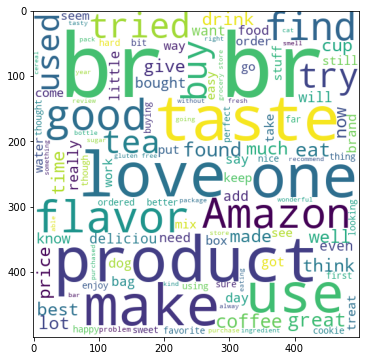

In [42]:
# Plotting the positive word cloud.
plt.figure(figsize=(15,6))
plt.imshow(positive_wc) #--->Here we can see that most frequent words in positive reviews.

In [43]:
# Creating negative word cloud
negative_wc = wc.generate(df[df['Score'] == 0]['Text'].str.cat(sep=" "))

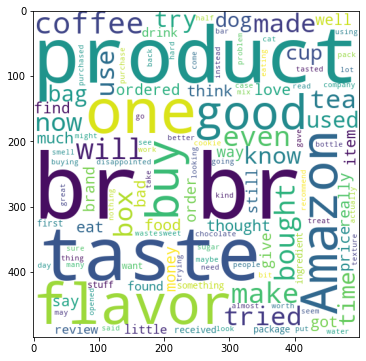

In [44]:
# Plotting negative word cloud
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)  #--->Here we can see that most frequent words in negative reviews.

In [46]:
df["Score"].value_counts()

1    336824
0     57107
Name: Score, dtype: int64

The Data is unbalanced so, we can use Upsampling

In [47]:
#Up sampling of negative(critical)

In [48]:
from sklearn.utils import resample

text_Critical__oversampled, y_Critical_oversampled,helpful_critical_num,helpful_critical_deno = resample(df['Text'].loc[df['Score'] == 0],
                                        df['Score'].loc[df['Score'] == 0],
                                        df['HelpfulnessNumerator'].loc[df['Score'] == 0],
                                        df['HelpfulnessDenominator'].loc[df['Score'] == 0],                      
                                        replace=True,
                                        n_samples=df['Text'].loc[df['Score'] == 1].shape[0],
                                        random_state=5)


critical_oversampled_df = pd.DataFrame()
critical_oversampled_df['Text'] = text_Critical__oversampled
critical_oversampled_df['Score'] =y_Critical_oversampled
critical_oversampled_df['HelpfulnessNumerator'] =helpful_critical_num
critical_oversampled_df['HelpfulnessDenominator'] =helpful_critical_deno

In [49]:
positive_df = df.loc[df['Score'] == 1]
positive_df.shape

(336824, 4)

In [50]:
critical_oversampled_df.shape

(336824, 4)

In [51]:
# concatinating positive and negative data.
balanced_final = pd.concat([positive_df,critical_oversampled_df], ignore_index=True)
balanced_final['Score'].value_counts()

1    336824
0    336824
Name: Score, dtype: int64

In [52]:
balanced_final.head() #---> Balanced dataset

,Text,Score,HelpfulnessNumerator,HelpfulnessDenominator
0,In June<br />I saw a charming group<br />of ro...,1,0,1
1,This is a fun way for children to learn their ...,1,1,1
2,"I grew up reading these Sendak books, and watc...",1,1,1
3,Get the movie or sound track and sing along wi...,1,1,1
4,A very entertaining rhyming story--cleaver and...,1,1,1


In [53]:
balanced_final.shape

(673648, 4)

In [54]:
#HelpfulnessNumerator & HelpfulnessDenominator are important only for visualization purpose but not important for sentimental analysis.
balanced_final.drop(["HelpfulnessNumerator","HelpfulnessDenominator"],inplace=True,axis=1)

In [55]:
balanced_final.shape

(673648, 2)

### Data Pre Processing

In [56]:
# import the libraries.
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
from bs4 import BeautifulSoup

In [57]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [58]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [59]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(balanced_final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|████████████████████████████████| 673648/673648 [06:41<00:00, 1678.95it/s]


In [60]:
preprocessed_reviews[1] #--->Processed review

'fun way children learn months year learn poems throughout school year like handmotions invent poem'

In [61]:
# sample data for analysis.
sample_data = balanced_final.sample(n = 5000)
sample_data.head()

,Text,Score
62996,"I was a little nervous at first, trying out th...",1
663131,I have ordered these Bergin Nut Company Brazil...,0
93541,This butter is very good. Better than any Amer...,1
671463,"Ok, I had my daughter pick me up some Truvia a...",0
385252,I ordered this product and Heinz ketchup with ...,0


In [62]:
sample_data["Score"].value_counts() #---> Data is balanced

1    2555
0    2445
Name: Score, dtype: int64

In [63]:
sample_reviews = [ preprocessed_reviews[i] for i in sample_data.index.values]
sample_reviews[0]

'little nervous first trying pasta divine looove pasta purchased different varieties shapes yes person said not boil duration used boiling regular pasta taste excellent added plus using rice made us one two believe us not remember one exactly called company inquire fantastic product made organic'

In [64]:
sample_data['preprocessed'] = sample_reviews
sample_data.head()

,Text,Score,preprocessed
62996,"I was a little nervous at first, trying out th...",1,little nervous first trying pasta divine looov...
663131,I have ordered these Bergin Nut Company Brazil...,0,ordered bergin nut company brazil nuts many mo...
93541,This butter is very good. Better than any Amer...,1,butter good better american butter tasted even...
671463,"Ok, I had my daughter pick me up some Truvia a...",0,ok daughter pick truvia grocery store pretty e...
385252,I ordered this product and Heinz ketchup with ...,0,ordered product heinz ketchup alsosalt month a...


In [65]:
sample_data.drop("Text",axis=1,inplace=True)
sample_data.head()

,Score,preprocessed
62996,1,little nervous first trying pasta divine looov...
663131,0,ordered bergin nut company brazil nuts many mo...
93541,1,butter good better american butter tasted even...
671463,0,ok daughter pick truvia grocery store pretty e...
385252,0,ordered product heinz ketchup alsosalt month a...


In [66]:
import nltk #---> nltk for Stemming( converting the perticular word into root word)

In [67]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()  #---> Object creation

In [68]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [69]:
sample_data["preprocessed"]=sample_data["preprocessed"].map(stem)

In [70]:
# cleaned data after pre-proccesing and stemming
sample_data.head()

,Score,preprocessed
62996,1,littl nervou first tri pasta divin looov pasta...
663131,0,order bergin nut compani brazil nut mani month...
93541,1,butter good better american butter tast even s...
671463,0,ok daughter pick truvia groceri store pretti e...
385252,0,order product heinz ketchup alsosalt month ago...


In [71]:
# Splitting the data into dependent and independent features.
X = sample_data.drop(columns =['Score'])
y = sample_data['Score'].values 
print(X.shape)
print(y.shape)

(5000, 1)
(5000,)


In [72]:
# Train Test split.
from sklearn.model_selection import train_test_split

In [73]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 24)

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(4000, 1)
(4000,)
(1000, 1)
(1000,)


In [75]:
#train_X vectorization
# Here i used countvectorizer and tfidf, but tfidf gives the more accuracy
# tfidf with 5000 max features gives more accuracy

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# count_vect = CountVectorizer(stop_words="english")
tfidf = TfidfVectorizer(stop_words="english",max_features=5000)

tfidf.fit(train_X['preprocessed'])
training_data = tfidf.transform(train_X['preprocessed'])

# num_feats =train_X[['HelpfulnessNumerator' ,'HelpfulnessDenominator']].values

# from scipy import sparse

# training_data = sparse.hstack(( num_feats, final_vectors))

training_data.shape

(4000, 5000)

In [76]:
#test_X vectorization
test_data = tfidf.transform(test_X['preprocessed'].values)
test_data.shape

(1000, 5000)

In [77]:
# test_feats = test_X[['HelpfulnessNumerator' ,'HelpfulnessDenominator']].values

# test_data = sparse.hstack(( test_feats, final_test_vectors))

# test_data.shape

In [79]:
# Imorting libraries for model training and testing.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [80]:
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_data,train_y)
pred_knn = knn.predict(test_data)
acc_knn = accuracy_score(test_y, pred_knn) * float(100)
print('accuracy for k = %d is %d%%' % (5, acc_knn))
print(confusion_matrix(test_y, pred_knn))
print("precision_score",precision_score(test_y, pred_knn))

accuracy for k = 5 is 54%
[[ 23 453]
 [  4 520]]
precision_score 0.5344295991778006


I try for various k neighbours but at k=5 accuracy is max

In [82]:
#gnb ---Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(training_data.toarray(),train_y).predict(test_data.toarray())
acc_gnb = accuracy_score(test_y, y_pred_gnb) * float(100)
print('accuracy for Gaussian Naive bayes is %d%%' % (acc_gnb))
print(confusion_matrix(test_y, y_pred_gnb))
print("precision_score",precision_score(test_y, y_pred_gnb))

accuracy for Gaussian Naive bayes is 64%
[[257 219]
 [138 386]]
precision_score 0.6380165289256199


In [83]:
#mnb ---Multinomial Naive bayes
mnb = MultinomialNB()
y_pred_mnb = mnb.fit(training_data.toarray(),train_y).predict(test_data.toarray())
acc_mnb = accuracy_score(test_y, y_pred_mnb) * float(100)
print('accuracy for Multinomial Naive bayes is %d%%' % (acc_mnb))
print(confusion_matrix(test_y, y_pred_mnb))
print("precision_score",precision_score(test_y, y_pred_mnb))

accuracy for Multinomial Naive bayes is 80%
[[368 108]
 [ 89 435]]
precision_score 0.8011049723756906


In [84]:
#bnb ---Bernoulli Naive bayes
bnb = BernoulliNB()
y_pred_bnb = bnb.fit(training_data.toarray(),train_y).predict(test_data.toarray())
acc_bnb = accuracy_score(test_y, y_pred_bnb) * float(100)
print('accuracy for Bernoulli Naive bayes is %d%%' % (acc_bnb))
print(confusion_matrix(test_y, y_pred_bnb))
print("precision_score",precision_score(test_y, y_pred_bnb))

accuracy for Bernoulli Naive bayes is 80%
[[362 114]
 [ 84 440]]
precision_score 0.7942238267148014


In [85]:
# import all the classification algorithms.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
# Creating the objects
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [87]:
# Creating the dictionary for all the objects.
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [88]:
# Creating the user defined fuction for training and testing.
def train_classifier(clf,training_data,train_y,test_data,test_y):
    clf.fit(training_data,train_y)
    y_pred = clf.predict(test_data)
    accuracy = accuracy_score(test_y,y_pred)
    precision = precision_score(test_y,y_pred)
    
    return accuracy,precision

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,training_data,train_y,test_data,test_y)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.809
Precision -  0.8220502901353965
For  KN
Accuracy -  0.536
Precision -  0.5305498981670062
For  DT
Accuracy -  0.694
Precision -  0.807909604519774
For  LR
Accuracy -  0.802
Precision -  0.818359375
For  RF
Accuracy -  0.778
Precision -  0.7785977859778598
For  AdaBoost
Accuracy -  0.781
Precision -  0.7861163227016885
For  BgC
Accuracy -  0.75
Precision -  0.7429078014184397
For  ETC
Accuracy -  0.79
Precision -  0.792910447761194
For  GBDT
Accuracy -  0.743
Precision -  0.77079107505071


In [92]:
clfs.keys()

dict_keys(['SVC', 'KN', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT'])

In [93]:
# creating dataframe for precision and accuracy visualization.
performance_df = pd.DataFrame({'Algorithm':list(clfs.keys()),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [94]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.809,0.822050
3,LR,0.802,0.818359
2,DT,0.694,0.807910
7,ETC,0.790,0.792910
5,AdaBoost,0.781,0.786116
4,RF,0.778,0.778598
8,GBDT,0.743,0.770791
6,BgC,0.750,0.742908
1,KN,0.536,0.530550


Only SVC,LOR,ETC,BNB are the best performing models.

In [95]:
# Creating Voting Classifier o best performing models.
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
bnb = BernoulliNB()

from sklearn.ensemble import VotingClassifier

In [96]:
voting = VotingClassifier(estimators=[('svc', svc),('lrc', lrc), ('etc', etc), ('bnb',bnb)],voting='soft')

In [97]:
# train the model
voting.fit(training_data,train_y)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('lrc',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('bnb', BernoulliNB())],
                 voting='soft')

In [98]:
# Prediction by model
y_pred = voting.predict(test_data)
print("Accuracy",accuracy_score(test_y, y_pred))
print("Precision",precision_score(test_y, y_pred))

Accuracy 0.827
Precision 0.819672131147541


In [99]:
# pickle the data
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))